In [84]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

!pip install openpyxl

In [85]:
df = pd.read_excel('./Date_Fruit_Datasets.xlsx')

In [86]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    #mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    #mi_scores = mi_scores.sort_values(ascending=False)

In [92]:
X=df.copy()
y=X.pop('Class')

y_MI=y.copy()

y_MI=y_MI.replace(regex={'BERHI': 1, 'DEGLET': 2,
              'DOKOL': 3, 'IRAQI': 4,
              'ROTANA': 5, 'SAFAVI': 6,
              'SOGAY': 7})

cols_with_missing = [col for col in X.columns
                     if X[col].isnull().any()]
X_r=X.drop(cols_with_missing, axis=1)
nan_value = float("NaN")
X_r.replace(0, nan_value, inplace=True)
X_r.replace("", nan_value, inplace=True)
X_r.dropna(how='all', axis=1, inplace=True)

input_shape = [X.shape[1]]


In [93]:
train_X, val_X, train_y, val_y = train_test_split(X_r, y_MI, random_state = 0)

In [94]:
#Using normal Dense layers
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=8),
])

model.compile(
    optimizer='adam',
    loss='mse'
)

In [95]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
6/6 [==============================] - 0s 29ms/step - loss: 3171773012395425792.0000 - val_loss: 850032370714148864.0000
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 357542524014821376.0000 - val_loss: 251333342903926784.0000
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 121345539215196160.0000 - val_loss: 100630113082671104.0000
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 42358165769027584.0000 - val_loss: 39636432108650496.0000
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 21630346508369920.0000 - val_loss: 20499700662665216.0000
Epoch 6/200
6/6 [==============================] - 0s 11ms/step - loss: 13299235235561472.0000 - val_loss: 7135555049488384.0000
Epoch 7/200
6/6 [==============================] - 0s 17ms/step - loss: 5040765281501184.0000 - val_loss: 4297030759350272.0000
Epoch 8/200
6/6 [==============================] - 0s 15ms/step - loss: 26776141456998

6/6 [==============================] - 0s 10ms/step - loss: 11610695401472.0000 - val_loss: 12350163779584.0000
Epoch 67/200
6/6 [==============================] - 0s 10ms/step - loss: 11606797844480.0000 - val_loss: 10416887431168.0000
Epoch 68/200
6/6 [==============================] - 0s 10ms/step - loss: 9696960315392.0000 - val_loss: 10752032243712.0000
Epoch 69/200
6/6 [==============================] - 0s 10ms/step - loss: 10444274139136.0000 - val_loss: 8825095585792.0000
Epoch 70/200
6/6 [==============================] - 0s 10ms/step - loss: 9267921813504.0000 - val_loss: 12403104284672.0000
Epoch 71/200
6/6 [==============================] - 0s 10ms/step - loss: 10266714570752.0000 - val_loss: 11403493638144.0000
Epoch 72/200
6/6 [==============================] - 0s 10ms/step - loss: 11860268023808.0000 - val_loss: 11454290853888.0000
Epoch 73/200
6/6 [==============================] - 0s 11ms/step - loss: 9688480481280.0000 - val_loss: 9937674567680.0000
Epoch 74/200
6/6 [

6/6 [==============================] - 0s 11ms/step - loss: 10921018654720.0000 - val_loss: 18657046429696.0000
Epoch 132/200
6/6 [==============================] - 0s 11ms/step - loss: 19093744779264.0000 - val_loss: 14213853478912.0000
Epoch 133/200
6/6 [==============================] - 0s 10ms/step - loss: 16548508991488.0000 - val_loss: 34532786962432.0000
Epoch 134/200
6/6 [==============================] - 0s 9ms/step - loss: 28439151116288.0000 - val_loss: 10028790579200.0000
Epoch 135/200
6/6 [==============================] - 0s 10ms/step - loss: 23526763397120.0000 - val_loss: 11753958146048.0000
Epoch 136/200
6/6 [==============================] - 0s 10ms/step - loss: 18547765936128.0000 - val_loss: 9432203264000.0000
Epoch 137/200
6/6 [==============================] - 0s 10ms/step - loss: 16412458352640.0000 - val_loss: 15477419016192.0000
Epoch 138/200
6/6 [==============================] - 0s 9ms/step - loss: 22774816964608.0000 - val_loss: 10319107719168.0000
Epoch 139

Epoch 196/200
6/6 [==============================] - 0s 10ms/step - loss: 6958098153472.0000 - val_loss: 6976921665536.0000
Epoch 197/200
6/6 [==============================] - 0s 9ms/step - loss: 6972613066752.0000 - val_loss: 6408107982848.0000
Epoch 198/200
6/6 [==============================] - 0s 10ms/step - loss: 6760674361344.0000 - val_loss: 6368175587328.0000
Epoch 199/200
6/6 [==============================] - 0s 9ms/step - loss: 6198458843136.0000 - val_loss: 6848991199232.0000
Epoch 200/200
6/6 [==============================] - 0s 11ms/step - loss: 6511026765824.0000 - val_loss: 6746506002432.0000


In [96]:
history_dense = pd.DataFrame(history.history)


In [97]:
#Using normal Dense layers and dropout
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=1),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

In [98]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
6/6 [==============================] - 0s 30ms/step - loss: 2250551296.0000 - val_loss: 950744064.0000
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 1169736576.0000 - val_loss: 330977568.0000
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 708658176.0000 - val_loss: 556519168.0000
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 454225152.0000 - val_loss: 99820976.0000
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 311663008.0000 - val_loss: 42521956.0000
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 246483552.0000 - val_loss: 79055624.0000
Epoch 7/200
6/6 [==============================] - 0s 13ms/step - loss: 216318560.0000 - val_loss: 91547640.0000
Epoch 8/200
6/6 [==============================] - 0s 12ms/step - loss: 192504032.0000 - val_loss: 19802168.0000
Epoch 9/200
6/6 [==============================] - 0s 13ms/step - loss: 153003152.0000 - va

6/6 [==============================] - 0s 11ms/step - loss: 195829.4219 - val_loss: 1.6666
Epoch 79/200
6/6 [==============================] - 0s 12ms/step - loss: 160138.8594 - val_loss: 1.6604
Epoch 80/200
6/6 [==============================] - 0s 11ms/step - loss: 259276.3438 - val_loss: 1.6546
Epoch 81/200
6/6 [==============================] - 0s 11ms/step - loss: 88267.6250 - val_loss: 1.6492
Epoch 82/200
6/6 [==============================] - 0s 11ms/step - loss: 90408.1328 - val_loss: 1.6446
Epoch 83/200
6/6 [==============================] - 0s 10ms/step - loss: 341656.3438 - val_loss: 1.6403
Epoch 84/200
6/6 [==============================] - 0s 11ms/step - loss: 231941.0156 - val_loss: 1.6354
Epoch 85/200
6/6 [==============================] - 0s 11ms/step - loss: 296043.1875 - val_loss: 1.6312
Epoch 86/200
6/6 [==============================] - 0s 11ms/step - loss: 116629.8984 - val_loss: 1.6264
Epoch 87/200
6/6 [==============================] - 0s 11ms/step - loss: 162922

Epoch 157/200
6/6 [==============================] - 0s 15ms/step - loss: 19696.0391 - val_loss: 1.5912
Epoch 158/200
6/6 [==============================] - 0s 14ms/step - loss: 38213.0039 - val_loss: 1.5909
Epoch 159/200
6/6 [==============================] - 0s 13ms/step - loss: 67997.4766 - val_loss: 1.5909
Epoch 160/200
6/6 [==============================] - 0s 11ms/step - loss: 19617.5371 - val_loss: 1.5907
Epoch 161/200
6/6 [==============================] - 0s 10ms/step - loss: 3897.0833 - val_loss: 1.5903
Epoch 162/200
6/6 [==============================] - 0s 10ms/step - loss: 14909.1475 - val_loss: 1.5900
Epoch 163/200
6/6 [==============================] - 0s 11ms/step - loss: 160900.2500 - val_loss: 1.5897
Epoch 164/200
6/6 [==============================] - 0s 14ms/step - loss: 69216.7578 - val_loss: 1.5895
Epoch 165/200
6/6 [==============================] - 0s 15ms/step - loss: 11834.2334 - val_loss: 1.5893
Epoch 166/200
6/6 [==============================] - 0s 15ms/ste

In [99]:
history_DD = pd.DataFrame(history.history)


In [118]:
#Using normal Dense layers, dropout and batch normalization
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    #layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    #layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    #layers.BatchNormalization(),
    layers.Dense(units=3),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

In [119]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6/6 [==============================] - 0s 49ms/step - loss: 2.8180 - val_loss: 63.8639
Epoch 2/200
6/6 [==============================] - 0s 15ms/step - loss: 1.6530 - val_loss: 26.0849
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 1.4356 - val_loss: 30.6614
Epoch 4/200
6/6 [==============================] - 0s 14ms/step - loss: 1.2843 - val_loss: 17.5879
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 1.1577 - val_loss: 14.7704
Epoch 6/200
6

6/6 [==============================] - 0s 16ms/step - loss: 0.5488 - val_loss: 1.5432
Epoch 77/200
6/6 [==============================] - 0s 12ms/step - loss: 0.5533 - val_loss: 1.7391
Epoch 78/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5449 - val_loss: 1.7517
Epoch 79/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5560 - val_loss: 1.7786
Epoch 80/200
6/6 [==============================] - 0s 15ms/step - loss: 0.5248 - val_loss: 1.6099
Epoch 81/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5381 - val_loss: 1.5975
Epoch 82/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5338 - val_loss: 1.5425
Epoch 83/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5163 - val_loss: 1.4909
Epoch 84/200
6/6 [==============================] - 0s 10ms/step - loss: 0.5146 - val_loss: 1.4739
Epoch 85/200
6/6 [==============================] - 0s 10ms/step - loss: 0.5115 - val_loss: 1.3877
Epoch 86/200
6/6 [=====

6/6 [==============================] - 0s 15ms/step - loss: 0.3887 - val_loss: 0.7944
Epoch 159/200
6/6 [==============================] - 0s 16ms/step - loss: 0.3736 - val_loss: 0.7631
Epoch 160/200
6/6 [==============================] - 0s 13ms/step - loss: 0.3840 - val_loss: 0.7805
Epoch 161/200
6/6 [==============================] - 0s 13ms/step - loss: 0.3765 - val_loss: 0.9159
Epoch 162/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4353 - val_loss: 0.8343
Epoch 163/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4314 - val_loss: 0.8744
Epoch 164/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4086 - val_loss: 0.7760
Epoch 165/200
6/6 [==============================] - 0s 15ms/step - loss: 0.3893 - val_loss: 0.7599
Epoch 166/200
6/6 [==============================] - 0s 15ms/step - loss: 0.3700 - val_loss: 0.7612
Epoch 167/200
6/6 [==============================] - 0s 15ms/step - loss: 0.3656 - val_loss: 0.7370
Epoch 168/200


In [120]:
history_DDB = pd.DataFrame(history.history)

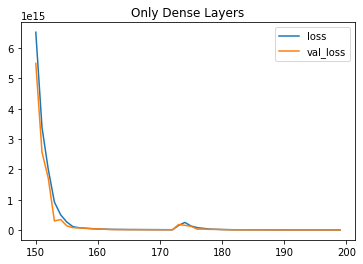

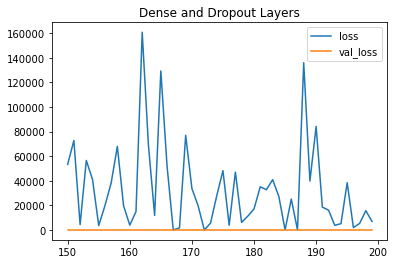

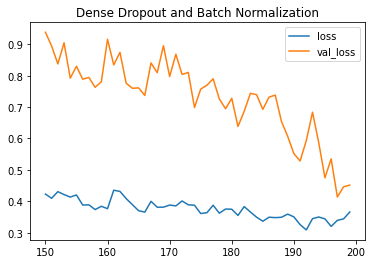

In [124]:
history_dense.loc[150:, ['loss','val_loss']].plot(title="Only Dense Layers");
history_DD.loc[150:, ['loss','val_loss']].plot(title="Dense and Dropout Layers");
history_DDB.loc[150:, ['loss','val_loss']].plot(title="Dense Dropout and Batch Normalization");



In [122]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1, 
    patience=10, 
    restore_best_weights=True,
)

history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=300,
    callbacks=[early_stopping]
)
history_DDB4 = pd.DataFrame(history.history)

Epoch 1/300
6/6 [==============================] - 0s 26ms/step - loss: 0.3069 - val_loss: 0.4382
Epoch 2/300
6/6 [==============================] - 0s 15ms/step - loss: 0.3386 - val_loss: 0.5811
Epoch 3/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3433 - val_loss: 0.4773
Epoch 4/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3575 - val_loss: 0.4801
Epoch 5/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3233 - val_loss: 0.5176
Epoch 6/300
6/6 [==============================] - 0s 13ms/step - loss: 0.3162 - val_loss: 0.4632
Epoch 7/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3160 - val_loss: 0.4885
Epoch 8/300
6/6 [==============================] - 0s 15ms/step - loss: 0.3075 - val_loss: 0.4755
Epoch 9/300
6/6 [==============================] - 0s 15ms/step - loss: 0.2977 - val_loss: 0.4691
Epoch 10/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3336 - val_loss: 0.4573
Epoch 11/300
6/6 [=

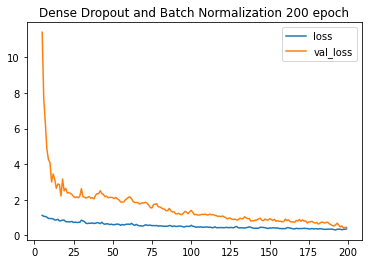

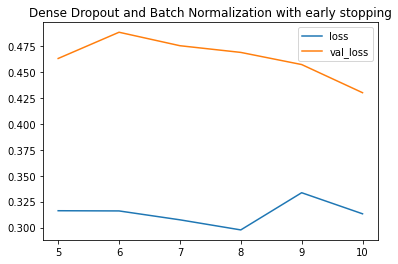

In [123]:

history_DDB.loc[150:, ['loss','val_loss']].plot(title="Dense Dropout and Batch Normalization 200 epoch");
history_DDB4.loc[15:, ['loss','val_loss']].plot(title="Dense Dropout and Batch Normalization with early stopping");